### (a)

\begin{align*}
p(y^{(i)}=1 \vert x^{(i)}) = & \ p(y^{(i)}=1, t^{(i)}=1 \vert x^{(i)}) + p(y^{(i)}=1, t^{(i)}=0 \vert x^{(i)}) \\
= & \ p(y^{(i)}=1 \vert t^{(i)}=1, x^{(i)}) p(t^{(i)}=1 \vert x^{(i)}) \\
& + p(y^{(i)}=1 \vert t^{(i)}=0, x^{(i)}) p (t^{(i)}=0 \vert x^{(i)}) \\
= & \ p(y^{(i)}=1 \vert t^{(i)}=1) p(t^{(i)}=1 \vert x^{(i)}) + 0 \\
= & \ \alpha \ p(t^{(i)}=1 \vert x^{(i)})
\end{align*}

so,

\begin{align*}
p(t^{(i)}=1 \vert x^{(i)}) = \frac {1} {\alpha} p(y^{(i)}=1 \vert x^{(i)}) \\
\alpha = p(y^{(i)}=1 \vert t^{(i)}=1)
\end{align*}

### (b)

assume:

\begin{align*}
h(x^{(i)}) \approx & \ p(y^{(i)} = 1 \vert x^{(i)}) \\
p(t^{(i)} = 1 \vert x^{(i)}) \approx & \ 1 \quad \textrm{when} \ x^{(i)} \in V_+
\end{align*}

then,

\begin{align*}
h(x^{(i)}) \approx & \ p(y^{(i)} = 1 \vert x^{(i)}) \quad \textrm{for all} \ x^{(i)} \\
= & \ p(y^{(i)} = 1, t^{(i)} = 1 \vert x^{(i)}) + p(y^{(i)} = 1, t^{(i)} = 0 \vert x^{(i)}) \\
= & \ p(y^{(i)} = 1, t^{(i)} = 1 \vert x^{(i)}) + 0 \\
= & \ p(y^{(i)} = 1 \vert t^{(i)} = 1, x^{(i)}) p(t^{(i)} = 1 \vert x^{(i)}) \quad \textrm{for all} \ x^{(i)} \in V_+ \\
\approx & \ p(y^{(i)} = 1 \vert t^{(i)} = 1) \quad \textrm{for all} \ x^{(i)} \in V_+ \\
= & \ \alpha \quad \textrm{for all} \ x^{(i)} \in V_+
\end{align*}

### (c)

In [1]:
import numpy as np
import src.util as util
from src.p01b_logreg import LogisticRegression

In [2]:
ds3_train_path = './data/ds3_train.csv'
ds3_valid_path = './data/ds3_valid.csv'
ds3_test_path  = './data/ds3_test.csv'

In [3]:
# use true label 't'
ds3_train_x_ai, ds3_train_t_ai = util.load_dataset(
    ds3_train_path, label_col='t', add_intercept=True
)
ds3_valid_x_ai, ds3_valid_t_ai = util.load_dataset(
    ds3_valid_path, label_col='t', add_intercept=True
)
ds3_test_x_ai, ds3_test_t_ai = util.load_dataset(
    ds3_test_path, label_col='t', add_intercept=True
)

In [4]:
clf_c = LogisticRegression() # reuse it
clf_c.fit(ds3_train_x_ai, ds3_train_t_ai)

ds3: test, accuracy: 0.9838709677419355


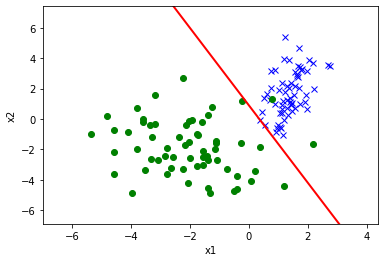

In [5]:
print('ds3: test, accuracy: {}'.format(
    np.mean(clf_c.predict(ds3_test_x_ai) == ds3_test_t_ai)
))
util.plot(ds3_test_x_ai, ds3_test_t_ai, clf_c.theta)

### (d)

In [6]:
# use y label 'y'
ds3_train_x_ai, ds3_train_y_ai = util.load_dataset(
    ds3_train_path, label_col='y', add_intercept=True
)
ds3_valid_x_ai, ds3_valid_y_ai = util.load_dataset(
    ds3_valid_path, label_col='y', add_intercept=True
)
ds3_test_x_ai, ds3_test_y_ai = util.load_dataset(
    ds3_test_path, label_col='y', add_intercept=True
)

In [7]:
clf_d = LogisticRegression() # reuse it
clf_d.fit(ds3_train_x_ai, ds3_train_y_ai)

ds3: test, accuracy: 0.8870967741935484


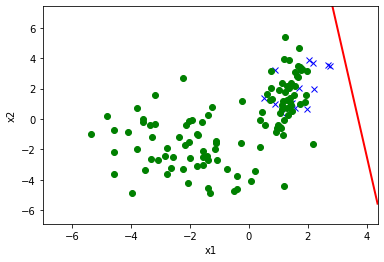

In [8]:
print('ds3: test, accuracy: {}'.format(
    np.mean(clf_d.predict(ds3_test_x_ai) == ds3_test_y_ai)
))
util.plot(ds3_test_x_ai, ds3_test_y_ai, clf_d.theta)

still has high accuracy, but obviously model is not what we want.

ds3: test, accuracy: 0.5


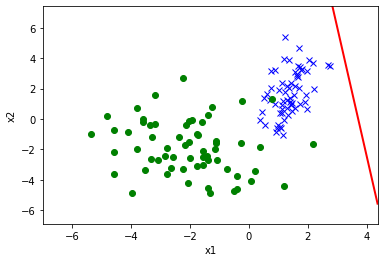

In [9]:
print('ds3: test, accuracy: {}'.format(
    np.mean(clf_d.predict(ds3_test_x_ai) == ds3_test_t_ai)
))
util.plot(ds3_test_x_ai, ds3_test_t_ai, clf_d.theta)

use true label to plot can show that.

### (e)

\begin{align*}
p(t^{(i)}=1 \vert x^{(i)}) = & \ \frac {1} {\alpha} p(y^{(i)}=1 \vert x^{(i)}) \quad \textrm{from problem (a)} \\
\approx & \ \frac {1} {\frac {1} {\vert V_+ \vert} \Sigma_{x^{(i)} \in V_+} h(x^{(i)}) } \ p(y^{(i)}=1 \vert x^{(i)})
\end{align*}

In [10]:
# from p01b_logreg, reuse it.
def hypothesis(theta, x):
    return 1 / (1 + np.exp(- np.dot(x, theta)))

In [11]:
alpha = np.mean(hypothesis(clf_d.theta, ds3_valid_x_ai))

we want a new $ \theta^\prime $ that:
\begin{align*}
\frac {1} {1 + e^{- (\theta^\prime)^T x}} = & \ \frac {1} {2} \\
(\theta^\prime)^T x = & \ 0
\end{align*}

and for old $ \theta $:

\begin{align*}
\frac {1} {\alpha} \frac {1} {1 + e^{-\theta^T x}} = & \ \frac {1} {2} \\
e^{- \theta^Tx} = & \ \frac {2} {\alpha} - 1 \\
0 = & \ \theta^T x + \log ( \frac {2} {\alpha} - 1)
\end{align*}

so,

\begin{align*}
(\theta^\prime)^T x = & \ \theta^T x + \log ( \frac {2} {\alpha} - 1) \\
\theta^\prime = & \theta + \log ( \frac {2} {\alpha} - 1) \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}
\end{align*}

In [12]:
theta_prime = clf_d.theta + np.log(2 / alpha -1) * np.array([1, 0, 0])

ds3: test, accuracy: 0.9274193548387096


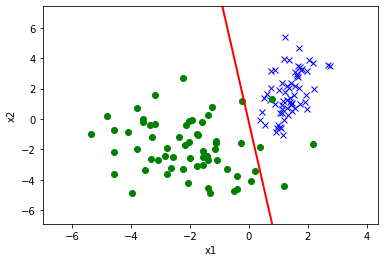

In [13]:
print('ds3: test, accuracy: {}'.format(
    np.mean(
        (1 / alpha * hypothesis(clf_d.theta, ds3_valid_x_ai) >= 0.5)
            == ds3_test_t_ai
    )
))
util.plot(ds3_test_x_ai, ds3_test_t_ai, theta_prime)